# Tutorial - Step1 : MTMR pretraining with Metric learning

## 1. Import requirements

In [1]:
import os
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from MTMR.vae import SmilesAutoencoder, AnnealingScheduler

## 2. Configure GPU (if available)

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [4]:
PROPERTY_NAME = "logp06"

## 4. Set directories (for inputs and outputs)

In [5]:
input_dir = os.path.join("DATA", PROPERTY_NAME)

In [6]:
_output_dir = "outputs_Tutorial_1_MTMR_pretraining"
if not os.path.exists(_output_dir):
    os.mkdir(_output_dir)

output_dir = os.path.join(_output_dir, PROPERTY_NAME)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [7]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [8]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [9]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

In [10]:
#print(dataset.shape)
#dataset.head()

In [11]:
#print(dataset_valid.shape)
#dataset_valid.head()

## 7. Initialize a generator of MTMR

In [12]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [13]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 3.393  loss_recon_src(tr): 3.393  loss_recon_tar(tr): 3.392  loss_recon_neg(tr): 3.394  loss_contractive(tr): 0.259  loss_margin(tr): 2.008  beta: 0.000  gamma: 0.000  valid_ratio(va): 0.120  similarity(va): 0.003
[00001000/00100000]  loss(tr): 0.706  loss_recon_src(tr): 0.712  loss_recon_tar(tr): 0.667  loss_recon_neg(tr): 0.671  loss_contractive(tr): 1.159  loss_margin(tr): 0.059  beta: 0.020  gamma: 0.020  valid_ratio(va): 0.875  similarity(va): 0.115
[00002000/00100000]  loss(tr): 0.582  loss_recon_src(tr): 0.556  loss_recon_tar(tr): 0.552  loss_recon_neg(tr): 0.521  loss_contractive(tr): 0.949  loss_margin(tr): 0.063  beta: 0.040  gamma: 0.040  valid_ratio(va): 0.985  similarity(va): 0.147
[00003000/00100000]  loss(tr): 0.505  loss_recon_src(tr): 0.462  loss_recon_tar(tr): 0.457  loss_recon_neg(tr): 0.441  loss_contractive(tr): 0.773  loss_margin(tr): 0.110  beta: 0.060  gamma: 0.060  valid_ratio(va): 0.995  similarity(va): 0.176
[00004000/00100000] 

[00034000/00100000]  loss(tr): 0.313  loss_recon_src(tr): 0.154  loss_recon_tar(tr): 0.154  loss_recon_neg(tr): 0.174  loss_contractive(tr): 0.156  loss_margin(tr): 0.066  beta: 0.680  gamma: 0.680  valid_ratio(va): 1.000  similarity(va): 0.385
[00035000/00100000]  loss(tr): 0.312  loss_recon_src(tr): 0.135  loss_recon_tar(tr): 0.149  loss_recon_neg(tr): 0.154  loss_contractive(tr): 0.165  loss_margin(tr): 0.072  beta: 0.700  gamma: 0.700  valid_ratio(va): 1.000  similarity(va): 0.344
[00036000/00100000]  loss(tr): 0.325  loss_recon_src(tr): 0.146  loss_recon_tar(tr): 0.140  loss_recon_neg(tr): 0.147  loss_contractive(tr): 0.189  loss_margin(tr): 0.061  beta: 0.720  gamma: 0.720  valid_ratio(va): 1.000  similarity(va): 0.387
[00037000/00100000]  loss(tr): 0.325  loss_recon_src(tr): 0.132  loss_recon_tar(tr): 0.173  loss_recon_neg(tr): 0.159  loss_contractive(tr): 0.173  loss_margin(tr): 0.057  beta: 0.740  gamma: 0.740  valid_ratio(va): 1.000  similarity(va): 0.356
[00038000/00100000] 

[00068000/00100000]  loss(tr): 0.310  loss_recon_src(tr): 0.124  loss_recon_tar(tr): 0.139  loss_recon_neg(tr): 0.153  loss_contractive(tr): 0.131  loss_margin(tr): 0.039  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.407
[00069000/00100000]  loss(tr): 0.278  loss_recon_src(tr): 0.144  loss_recon_tar(tr): 0.130  loss_recon_neg(tr): 0.105  loss_contractive(tr): 0.136  loss_margin(tr): 0.018  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.402
[00070000/00100000]  loss(tr): 0.263  loss_recon_src(tr): 0.110  loss_recon_tar(tr): 0.138  loss_recon_neg(tr): 0.134  loss_contractive(tr): 0.102  loss_margin(tr): 0.034  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.432
[00071000/00100000]  loss(tr): 0.289  loss_recon_src(tr): 0.105  loss_recon_tar(tr): 0.115  loss_recon_neg(tr): 0.116  loss_contractive(tr): 0.109  loss_margin(tr): 0.067  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.405
[00072000/00100000] 

## 9. Visualize for loss analysis

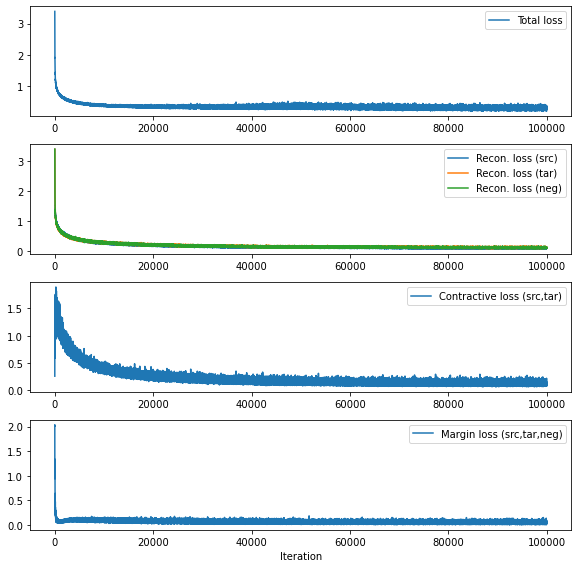

In [14]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_CONTRACTIVE"], label="Contractive loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_MARGIN"], label="Margin loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

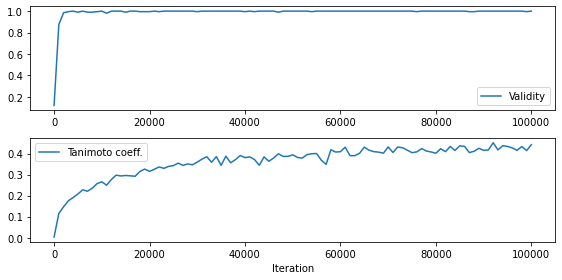

In [15]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()